In [3]:
from rdkit import Chem
from rdkit.Chem import rdFMCS

from transfer_bond import transfer_bond_orders
import os
import sys
from Bio import SeqIO
import re

In [4]:
# Function to extract SMILES
def extract_smiles_from_fasta(fasta_file):
    """This might not work for everyone. It looks for |smiles assumes the seubqequent string is the SMILES.
    """
    smiles_list = []
    
    # Read the FASTA file
    for record in SeqIO.parse(fasta_file, "fasta"):
        description = record.description
        
        # Check if the description contains '|smiles'
        if '|smiles' in description:
            # Extract the SMILES string, which is in the sequence line
            smiles = record.seq
            smiles_list.append(str(smiles))  # Convert sequence to string and add to list
    
    return smiles_list

In [5]:
# Read fasta input, you can change this to read smiles from any format.
# For example, you can use the following code to read smiles from a fasta file:
source = 'fasta_input'
# Find all fasta files in source dir
fasta_files = [f for f in os.listdir(source) if f.endswith('.fasta')]
# Read fasta files
smiles = []
for fasta_file in fasta_files:
    with open(os.path.join(source, fasta_file), 'r') as f:
        smiles += extract_smiles_from_fasta(f)

smiles

['CNC(=O)C[N@H+]1Cc2ccc(Cl)cc2[C@H](C(=O)Nc2cncc3cc(Cl)ccc23)C1',
 'C[C@@]1(C(=O)Nc2cncc3ccccc23)CNS(=O)(=O)c2ccc(Cl)cc21']

In [6]:
#  Read Mol2 input
output_source = 'output'
mol2_files = ["./output/"+f for f in os.listdir(output_source) if f.endswith('.mol2')]
mols = []
for mol2_file in mol2_files:
    print(str(mol2_file))

    mols.append(
        Chem.MolFromMol2File(str(mol2_file), sanitize=False)
    ) 

./output/ligand_3.mol2
./output/ligand_2.mol2


[15:09:56] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[15:09:56] predicted: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.


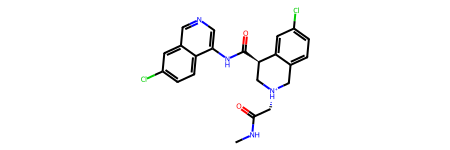

In [7]:
Chem.MolFromSmiles(smiles[0])

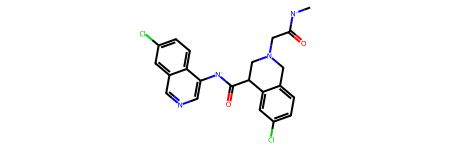

In [8]:
Chem.MolFromSmiles(Chem.MolToSmiles(mols[0]))

In [9]:
mols_bond_fixed = []
for mol,ref in zip(mols,smiles):
   
    mols_bond_fixed.append(transfer_bond_orders(mol,ref))

In [10]:
# save it in sdf 
output_sdf = 'outputs_with_bonds_fixed/'
for i, mol in enumerate(mols_bond_fixed):
    print(f'Writing ligand_{i+1}.sdf')
    path = output_sdf+f'ligand_{i+1}.sdf'
    Chem.MolToMolFile(mol, path)

Writing ligand_1.sdf
Writing ligand_2.sdf
